<a href="https://colab.research.google.com/github/Ronaldolvf/projetos/blob/main/Profissao_Analista_de_dados_(projeto)_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np  # Manipulação eficiente de arrays e cálculos matemáticos.
import pandas as pd  # Análise e manipulação de dados em DataFrame.
import seaborn as sns  # Visualização de dados estatísticos com gráficos.
import matplotlib.pyplot as plt  # Criação de gráficos personalizados.

from sklearn.linear_model import LinearRegression  # Modelo de regressão linear.
model = LinearRegression()  # Instância do modelo de regressão linear.
from sklearn.model_selection import train_test_split  # Divisão de dados em treinamento e teste.
from sklearn.metrics import r2_score  # Métrica R² para avaliação de desempenho do modelo.

In [5]:
df_price_23 = pd.read_csv('/content/house_price_23.csv', sep = ',')
df_price_23 = df_price_23.drop(df_price_23.query('purpose == "For Rent"').index)
df_price_23.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,new_price
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,10000000
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,6900000
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,16500000
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,43500000
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,7000000


O valor (price) comesa em 15K e gilanalida em 44M.

In [6]:
df_price_23.shape

(70947, 9)

In [20]:
print (df_price_23['price'].max())
print (df_price_23['price'].min())

44900000
16000


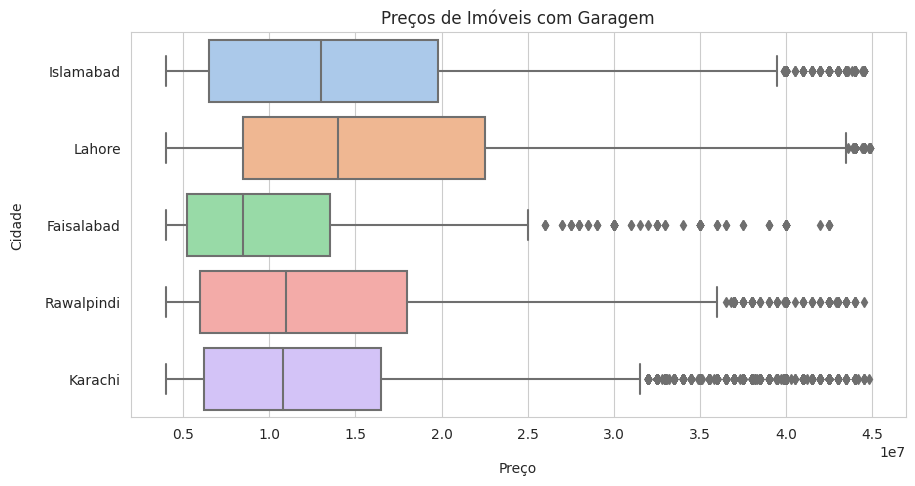

In [7]:
# Configurando o estilo do gráfico e definindo o tamanho da figura
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))

    # Criando um boxplot para visualizar a relação
    grafico = sns.boxplot(data = df_price_23, x = 'new_price', y = 'city', palette="pastel")

    # Configurando título e rótulos dos eixos
    grafico.set(title='Preços de Imóveis com Garagem', xlabel = 'Preço', ylabel = 'Cidade')
    grafico.xaxis.labelpad = 15
    grafico.yaxis.labelpad = 15

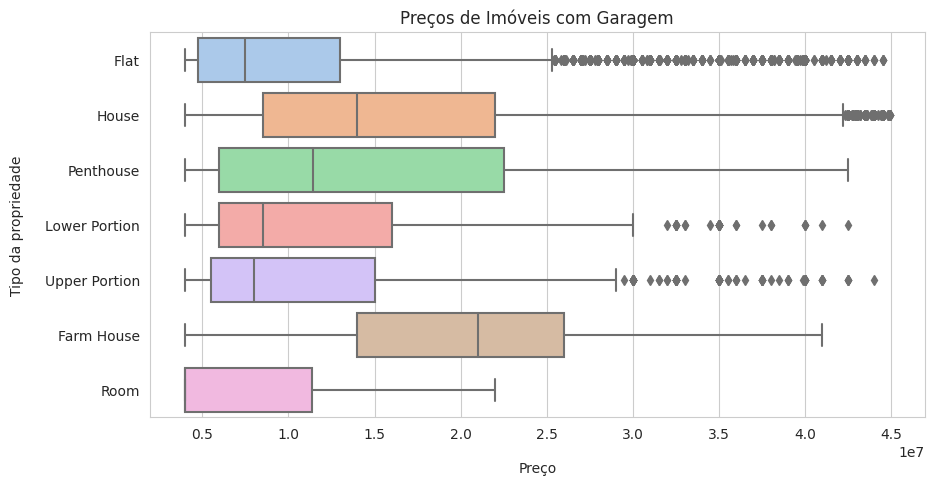

In [8]:
# Configurando o estilo do gráfico e definindo o tamanho da figura
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))

    # Criando um boxplot para visualizar a relação abaixo.
    grafico = sns.boxplot(data = df_price_23, x = 'new_price', y = 'property_type', palette="pastel")

    # Configurando título e rótulos dos eixos
    grafico.set(title='Preços de Imóveis com Garagem', xlabel = 'Preço', ylabel = 'Tipo da propriedade')
    grafico.xaxis.labelpad = 15
    grafico.yaxis.labelpad = 15

<ipython-input-9-bb5240b86718>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  grafico = sns.catplot(data = df_price_23, x = 'Area_in_Marla', y = 'property_type', palette="pastel", height = 5, aspect=2)


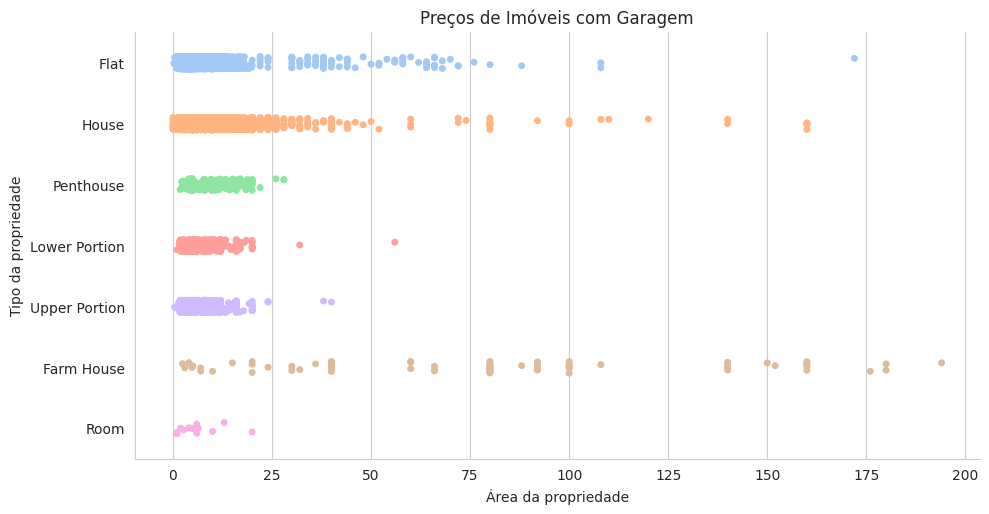

In [9]:
# Configurando o estilo do gráfico e definindo o tamanho da figura
with sns.axes_style('whitegrid'):

    # Criando um catplot para visualizar a relação abaixo.
    grafico = sns.catplot(data = df_price_23, x = 'Area_in_Marla', y = 'property_type', palette="pastel", height = 5, aspect=2)

    # Configurando título e rótulos dos eixos
    grafico.set(title='Preços de Imóveis com Garagem', xlabel = 'Área da propriedade', ylabel = 'Tipo da propriedade')

In [10]:
df_price_23 = df_price_23.drop(['purpose', 'location', 'city', 'new_price'], axis = 1)
df_price_23.head()

,property_type,price,baths,bedrooms,Area_in_Marla
0,Flat,10000000,2,2,4.0
1,Flat,6900000,3,3,5.6
2,House,16500000,6,5,8.0
3,House,43500000,4,4,40.0
4,House,7000000,3,3,8.0


In [11]:
df_price_23.max()

property_type    Upper Portion
price                 44900000
baths                        7
bedrooms                     6
Area_in_Marla            194.0
dtype: object

In [12]:
df_price_23['Farm_House'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Farm House' else 0 )
df_price_23['Flat'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Flat' else 0 )
df_price_23['House'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'House' else 0 )
df_price_23['Lower_Portion'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Lower Portion' else 0 )
df_price_23['Penthouse'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Penthouse' else 0 )
df_price_23['Room'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Room' else 0 )
df_price_23['Upper_Portion'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Upper Portion' else 0 )

In [13]:
df_price_23 = df_price_23.drop('property_type', axis = 1)
df_price_23.head()

,price,baths,bedrooms,Area_in_Marla,Farm_House,Flat,House,Lower_Portion,Penthouse,Room,Upper_Portion
0,10000000,2,2,4.0,0,1,0,0,0,0,0
1,6900000,3,3,5.6,0,1,0,0,0,0,0
2,16500000,6,5,8.0,0,0,1,0,0,0,0
3,43500000,4,4,40.0,0,0,1,0,0,0,0
4,7000000,3,3,8.0,0,0,1,0,0,0,0


In [14]:
#dados_para_treino = [['property_type', 'city',	'baths',	'bedrooms', 'Area_in_Marla']]
dados_para_treino = df_price_23[['baths', 'bedrooms', 'Area_in_Marla', 'Farm_House',	'Flat',	'House',	'Lower_Portion',	'Penthouse',	'Room',	'Upper_Portion']]

baths	= 2
bedrooms = 3
Area_in_Marla = 65.0

Farm_House = 1
Flat	= 0
House	= 0
Lower_Portion = 0
Penthouse	= 0
Room	= 0
Upper_Portion = 0

In [15]:
def proj_price(a: np.array):

    # Dividindo os dados em conjuntos de treinamento e teste.
    predictors_train, predictors_test, target_train, target_test = train_test_split(
        dados_para_treino,
        df_price_23['price'],
        test_size = 0.25,
        random_state = 2811)

    # Treinando o modelo de regressão linear com os dados de treinamento.
    modelo = model.fit(predictors_train, target_train)

    # Realizando uma previsão com base nos valores fornecidos.
    peso = modelo.predict(a.reshape(1, -1))
    print(f'Predição: {(peso).round(2)}')

    # Usando o modelo para prever o conjunto de teste e calculando o coeficiente de determinação R².
    target_predicted = modelo.predict(predictors_test)
    r_squared = r2_score(target_test, target_predicted)
    print(f'R²: {(r_squared).round(2)} %')

    return proj_price

# Chamando a função.
proj_price(np.array([	baths,	bedrooms,	Area_in_Marla, Farm_House, Flat,	House,	Lower_Portion,	Penthouse,	Room,	Upper_Portion]))

Predição: [3823297.51]
R²: 0.55 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<function __main__.proj_price(a: <built-in function array>)>